In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import pandas as pd
# from scipy import stats
from sklearn.linear_model import LinearRegression

In [55]:
df = pd.read_csv("frg_norm_hssm.csv")
trial_time = 3
stress_dict = {1:'pre',2:'post'}
tt_dict = {5:'short',20:'long'}
leave_resp_filt = df["response"]==0

In [79]:
def cum_rew_func(df,subid,stress_cond,tt_cond,ax,c):
    subid_filt = df["subj_idx"]==subid
    stress_filt = df["condition"]==stress_cond
    tt_filt = df["travel_time"]==tt_cond
    patch_leave_idx = pd.Index(df[subid_filt & stress_filt & tt_filt & leave_resp_filt].index)
    patch_entry_idx = pd.Index([df[subid_filt & stress_filt & tt_filt].index[0]]+list(patch_leave_idx+1))
    patch_trial_idx = [list(range(i,j+1)) for (i,j) in list(zip(patch_entry_idx,patch_leave_idx))]
#    rel_patch_trial_idx = [np.array(i)-i[0] for i in patch_trial_idx]
    rel_leave_idxs = list(patch_leave_idx - patch_entry_idx[0])

##    for idxs in patch_trial_idx:
##        patch_num = patch_trial_idx.index(idxs)
##        if len(df.loc[idxs]["travel_time"].unique())>1:
##            patch_trial_idx.remove(idxs)

    env_cum_rew = []
    patch_cum_rew = []
    for idxs in patch_trial_idx:
        patch_num = patch_trial_idx.index(idxs)
        tot_rew = np.array(df.loc[idxs][:]["tot_reward"])
        patch_rew = tot_rew-tot_rew[0]
        env_cum_rew+=list(tot_rew)
        patch_cum_rew.append(patch_rew)
##  #     ax.plot(range(len(idxs)-1),np.diff(patch_rew),'--'+c)#,label="Patch {}".format(patch_num))
##  # ax.plot(env_cum_rew-env_cum_rew[0],'-'+c,label=str(subid)+' '+str(stress_dict[stress])+str(tt_dict[tt]))
    x_data = np.array([trial_time]*len(env_cum_rew))
    x_data[np.array(rel_leave_idxs)] = tt_cond
    x_data = np.cumsum(x_data)
    env_cum_rew = np.array(env_cum_rew)
    y_data = env_cum_rew-env_cum_rew[0]
    reg = LinearRegression(fit_intercept=False).fit(x_data.reshape(-1,1),y_data.reshape(-1,1))
    slope = reg.coef_; slope = slope.flatten()
    ax.plot(x_data,x_data*slope,'--'+c)
    ax.plot(x_data,env_cum_rew-env_cum_rew[0],'-'+c,label=str(subid)+' '+str(stress_dict[stress])+str(tt_dict[tt]))
    ax.legend()
    return env_cum_rew,patch_cum_rew,ax

In [57]:
subid = 7873; 
stress_cond = 1; tt_cond = 5; c='C0'

subid_filt = df["subj_idx"]==subid
stress_filt = df["condition"]==stress_cond
tt_filt = df["travel_time"]==tt_cond
patch_leave_idx = pd.Index(df[subid_filt & stress_filt & tt_filt & leave_resp_filt].index)
patch_entry_idx = pd.Index([df[subid_filt & stress_filt & tt_filt].index[0]]+list(patch_leave_idx+1))
patch_trial_idx = [list(range(i,j+1)) for (i,j) in list(zip(patch_entry_idx,patch_leave_idx))]
rel_leave_idxs = list(patch_leave_idx - patch_entry_idx[0])
rel_leave_idxs
# for idxs in patch_trial_idx:
#     patch_num = patch_trial_idx.index(idxs)
#     if len(df.loc[idxs]["travel_time"].unique())>1:
#         patch_trial_idx.remove(idxs)

[6, 16, 24, 36]

[array([0.        , 0.00793763, 0.01411262, 0.01976883, 0.02450648,
        0.02841786, 0.02841786]),
 array([0.        , 0.01779212, 0.03492953, 0.05162867, 0.06728238,
        0.08174426, 0.09406341, 0.10489936, 0.11355657, 0.11355657]),
 array([0.        , 0.01873798, 0.03550079, 0.05053137, 0.06334856,
        0.07503873, 0.08474094, 0.08474094]),
 array([0.        , 0.01835967, 0.03547053, 0.05096115, 0.06517561,
        0.07880983, 0.09064375, 0.10177073, 0.11248823, 0.1213094 ,
        0.1286828 , 0.1286828 ])]

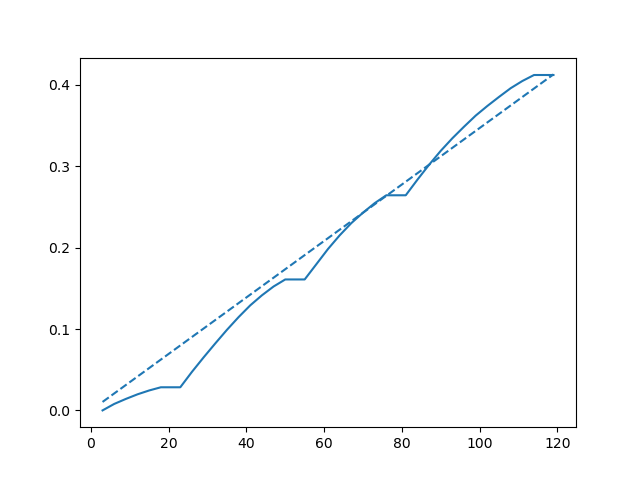

In [81]:
fig,ax=plt.subplots()

env_cum_rew = []
patch_cum_rew = []
for idxs in patch_trial_idx:
    patch_num = patch_trial_idx.index(idxs)
    tot_rew = np.array(df.loc[idxs][:]["tot_reward"])
    patch_rew = tot_rew-tot_rew[0]
    env_cum_rew+=list(tot_rew)
    patch_cum_rew.append(patch_rew)
#     ax.plot(range(len(idxs)-1),np.diff(patch_rew),'--'+c)#,label="Patch {}".format(patch_num))
#     ax.legend()
# ax.plot(env_cum_rew-env_cum_rew[0],'-'+c,label=str(subid)+' '+str(stress_dict[stress])+str(tt_dict[tt]))
x_data = np.array([trial_time]*len(env_cum_rew))
x_data[np.array(rel_leave_idxs)] = tt_cond
x_data = np.cumsum(x_data)
env_cum_rew = np.array(env_cum_rew)
y_data = env_cum_rew-env_cum_rew[0]
reg = LinearRegression(fit_intercept=False).fit(x_data.reshape(-1,1),y_data.reshape(-1,1))
slope = reg.coef_
slope = slope.flatten()
ax.plot(x_data,x_data*slope,'--'+c)
ax.plot(x_data,y_data,'-'+c,label=str(subid)+' '+str(stress_dict[stress])+str(tt_dict[tt]))

In [77]:
slope = reg.coef_
slope = slope.flatten()
ax.plot(x_data,x_data*slope)
reg.score(x_data.reshape(-1,1),y_data.reshape(-1,1))

0.9766800724249436

In [ ]:
patch_cum_rew
post_idx = len()
long_patch_len = max([len(i) for i in ])
num_patches = len()
all_cum_rew = np.nan*np.ones((num_patches,long_patch_len))

##stay_lock
for i in range(num_patches):
    _cum_rew[i] = list(_rew[i])+(long_patch_len-len(_rew[i]))*[np.nan]

pre_mean_rew = np.nanmean(_cum_rew,0)

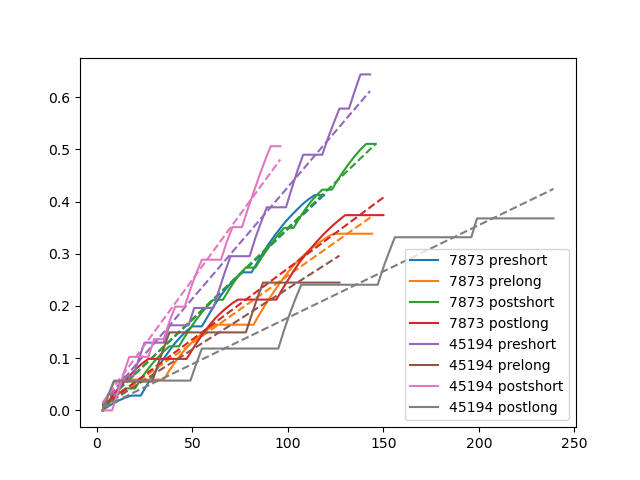

In [80]:
fig,ax=plt.subplots()

subid = 7873; 

stress = 1; tt = 5
preshort_env_rew,_,ax = cum_rew_func(df,subid,stress,tt,ax,'C0')

stress = 1; tt = 20
prelong_env_rew,_,ax = cum_rew_func(df,subid,stress,tt,ax,'C1')

stress = 2; tt = 5
postshort_env_rew,_,ax = cum_rew_func(df,subid,stress,tt,ax,'C2')

stress = 2; tt = 20
postlong_env_rew,_,ax = cum_rew_func(df,subid,stress,tt,ax,'C3')

subid = 45194; 

stress = 1; tt = 5
preshort_env_rew,_,ax = cum_rew_func(df,subid,stress,tt,ax,'C4')

stress = 1; tt = 20
prelong_env_rew,_,ax = cum_rew_func(df,subid,stress,tt,ax,'C5')

stress = 2; tt = 5
postshort_env_rew,_,ax = cum_rew_func(df,subid,stress,tt,ax,'C6')

stress = 2; tt = 20
postlong_env_rew,_,ax = cum_rew_func(df,subid,stress,tt,ax,'C7')
